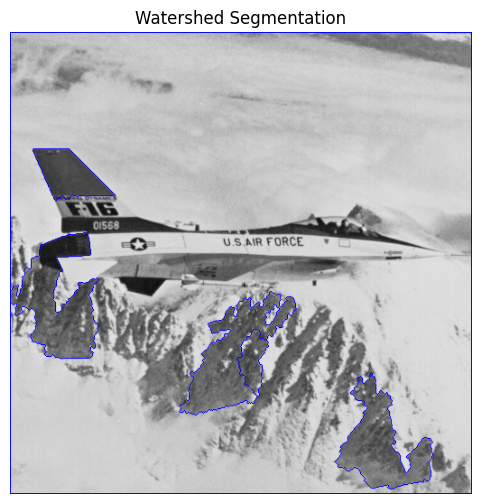

In [3]:
#watershed algorithm
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the input image
img = cv2.imread('jetplane.tif')
original = img.copy()

# 2. Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Apply thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 4. Remove small noise using morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 5. Find sure background area by dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# 6. Find sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# 7. Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 8. Label markers
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # So background is not 0
markers[unknown == 255] = 0  # Mark unknown region as 0

# 9. Apply watershed algorithm
markers = cv2.watershed(original, ma
                        rkers)

# 10. Draw watershed boundary (where marker == -1)
original[markers == -1] = [255, 0, 0]  # Red boundary

# 11. Display the result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis('off')
plt.show()

C:\Users\robbie\AppData\Local\Temp\ipykernel_16336\2163925904.py:46: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


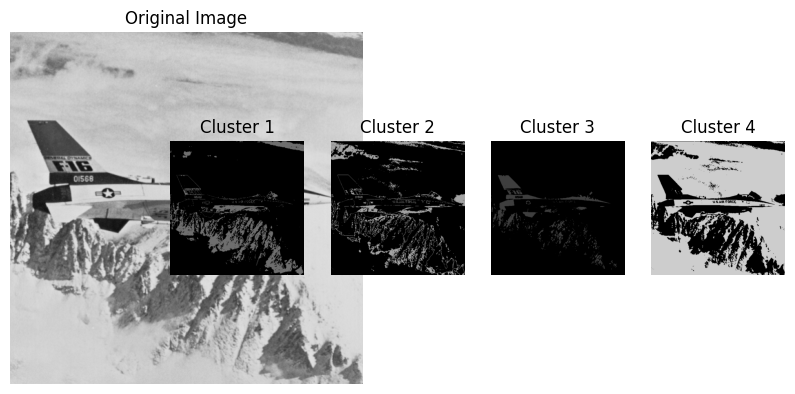

In [5]:
#K-Means
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
img = cv2.imread('jetplane.tif')
if img is None:
    raise FileNotFoundError("Image not found.")

# Step 2: Reshape image into a 2D array of pixels (rows × 3 color channels)
Z = img.reshape((-1, 3))
Z = np.float32(Z)

# Step 3: Define criteria and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4  # Number of clusters
attempts = 10
flags = cv2.KMEANS_RANDOM_CENTERS

ret, labels, centers = cv2.kmeans(Z, K, None, criteria, attempts, flags)

# Step 4: Convert center values to uint8 (colors)
centers = np.uint8(centers)

# Step 5: Replace each pixel with its corresponding cluster center
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(img.shape)

# Step 6: Display the result
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Create and display each segment
for i in range(K):
    segment = np.zeros_like(img)
    segment[labels.reshape(img.shape[:2]) == i] = centers[i]
    plt.subplot(1, K + 1, i + 2)
    plt.imshow(cv2.cvtColor(segment, cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

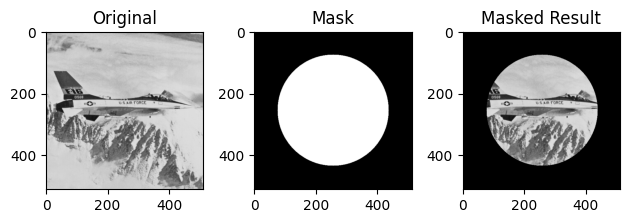

In [9]:
#MASK+ROI
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('jetplane.tif')
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Define ROI using a circle in the center
center = (img.shape[1]//2, img.shape[0]//2)
radius = 180
cv2.circle(mask, center, radius, 255, -1)

# Apply mask to image
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Extract rectangular ROI (e.g., bounding box)
x, y, w, h = 100, 100, 150, 150
roi = img[y:y+h, x:x+w]

# Display
plt.subplot(131); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Original')
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Mask')
plt.subplot(133); plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)); plt.title('Masked Result')
plt.tight_layout(); plt.show()